<a href="https://colab.research.google.com/github/NikosMav/Images-and-PCA/blob/main/%CE%9C%CE%B1%CF%85%CF%81%CE%B1%CF%80%CE%AF%CE%B4%CE%B7%CF%82_1115201700082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from skimage.transform import resize
from sklearn.decomposition import PCA
from PIL import Image
import os
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Ερώτημα 1**

## **Ζητούμενο Ι**

In [ ]:
# Dimensions
width = 100
height = 100

In [ ]:
def loadImages(path):

  filenames = os.listdir(path)
  numOfImages = len(filenames)

  images_reshaped = []
  labels = []

  for imageFileName in filenames:

    # Read image from data
    image = cv2.imread(path + '/' + imageFileName)

    # Resize image to 100 x 100
    image_resized = resize(image, (width, height), anti_aliasing=True)

    # Convert the image to an array and give it a new shape without changing its data
    image_reshaped = np.reshape(image_resized, width * height * 3)

    # Add to the list 
    images_reshaped.append(image_reshaped)

    # Get the image's label
    if imageFileName[0] == 'W':
      image_label = 0
    elif imageFileName[0] == 'F':
      image_label = 1
    elif imageFileName[0] == 'S':
      image_label = 2
    else:
      print("Wrong image!")
    
    # Add to labels
    labels.append(image_label)

  # Lastly convert lists to numpy arrays
  final_images = np.array(images_reshaped)
  final_labels = np.array(labels)

  # transpose Images so each one occupies a column
  final_images_transposed = np.transpose(final_images)

  return (final_images_transposed, final_labels)


In [ ]:
(rawImages, labels) = loadImages("/content/drive/MyDrive/Colab Notebooks/Μηχανική Μάθηση/Project2/images")

## **Ζητούμενο ΙΙ**

In [ ]:
def DimReductionPCA(images, principal_components=2):

  pca = PCA(principal_components)
  images = np.transpose(images)
  converted_data = pca.fit_transform(images)

  return converted_data

def PCA_ImageSpaceVisualization(Images):

  numOfImages = len(Images[1])

  images_transformed = DimReductionPCA(Images[0], 2)
  images_transformed = np.transpose(images_transformed)

  # find max and min x and y needed for plotting
  maxX = np.amax(images_transformed[0])
  maxY = np.amax(images_transformed[1])
  minX = np.amin(images_transformed[0])
  minY = np.amin(images_transformed[1])
  
  # Plot the data
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  ax = plt.subplot()

  for imageNumber in range(numOfImages):
    # get the X and Y coordinates
    x = images_transformed[0][imageNumber]
    y = images_transformed[1][imageNumber]

    # extract and reshape the image in order to split it in 3 arrays for r, g, b
    imageVector = Images[0][:,imageNumber]
    img = np.reshape(imageVector, (width, height, 3))

    b,g,r = cv2.split(img)
    imgRGB = cv2.merge((r,g,b))

    imagebox = OffsetImage(imgRGB, zoom=0.5)
    plotX = np.interp(x, [minX, maxX], [0.05, 0.95])
    plotY = np.interp(y, [minY, maxY], [0.05, 0.95])

    xy = (plotX, plotY)

    ab = AnnotationBbox(imagebox, xy, xybox=(0, 0), xycoords='axes fraction', boxcoords="offset points")                                  
    ax.add_artist(ab)

  plt.show()

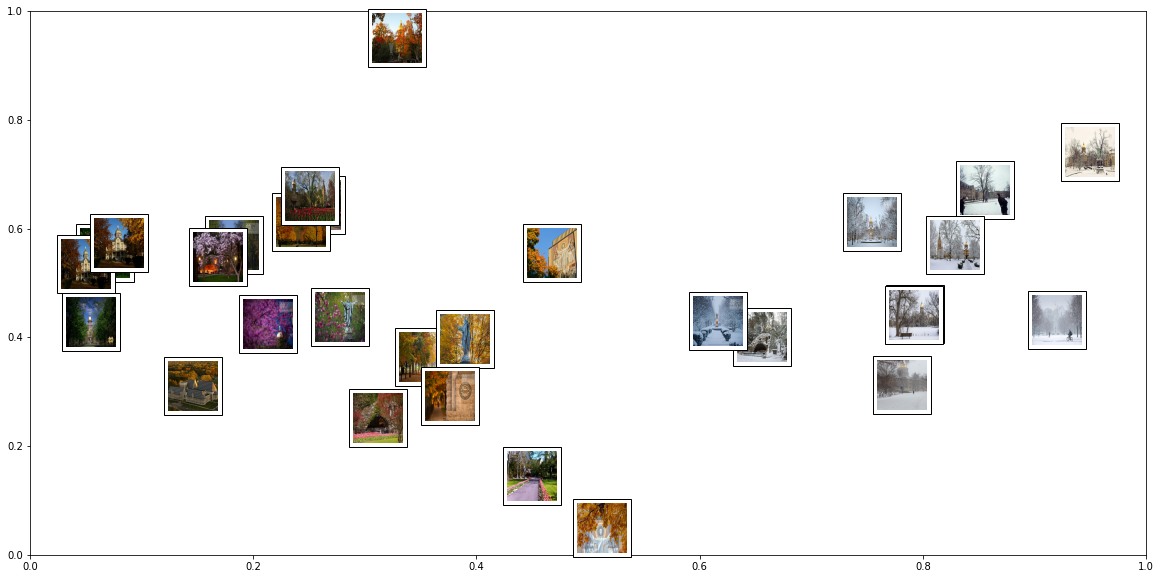

In [ ]:
PCA_ImageSpaceVisualization((rawImages, labels))

## **Ζητούμενο ΙΙΙ**


Όταν δύο εικόνες βρίσκονται **κοντά** στο χώρο των δύο διαστάσεων σημαίνει πως **δεν παρουσιάζουν μεγάλη απόκλιση** στις κατευθύνσεις μέγιστης διακύμανσης. Αντίστοιχα όταν οι εικονες **απέχουν πολύ παρουσιάζουν μεγάλη απόκλιση**. 


Μια γενίκευση ωστόσο των παραπάνω και στον αρχικό χώρο των πολλών διαστάσεων θα ήταν **λανθασμένη** αφού μεγαλώνοντας τη διαστατικότητα μπορεί να παρουσιαστούν διαφορετικά αποτελέσματα ειδικά για μικρές αποστάσεις.
Όταν οι αποστάσεις μεταξύ εικόνων είναι μεγάλες στον χώρο των δύο διαστάσεων τότε **είναι πολύ πιθανό** το αποτέλεσμα να παραμείνει ίδιο και για τον αρχικό χώρο.Για μικρές αποστάσεις ωστόσο **δεν γενικεύεται τόσο εύκολα** και μπορεί να παρουσιαστούν διαφορετικά αποτελέσματα.

## **Ζητούμενο IV**


Εύκολα παρατηρούμε ότι οι εποχές **ομαδοποιούνται**. Αυτό συμβαίνει επειδή οι εποχές **χαρακτηρίζονται από συγκεκριμένα χρώματα**. Αυτό γίνεται εμφανές κυρίως τον χειμώνα που επικρατεί το άσπρο χρώμα του χιονιού που οδηγεί σε μεγάλες τιμές των pixel σε RGB κωδικοποίηση. Αν παρατηρήσουμε λίγο καλύτερα το γράφημα θα αντιληφθούμε καλύτερα τα κριτήρια των ομαδοποιήσεων τα οποία εν τέλει **δικαιολογούνται βάσει των χρωμάτων** των εικόνων.

## **Ζητούμενο V**

In [ ]:
pcaImages = DimReductionPCA(rawImages, 7)
rawImages = np.transpose(rawImages)

# all 4 possible classifiers
hiClf1 = KNeighborsClassifier(n_neighbors=1)
hiClf3 = KNeighborsClassifier(n_neighbors=3)
lowClf1 = KNeighborsClassifier(n_neighbors=1)
lowClf3 = KNeighborsClassifier(n_neighbors=3)

# 5-fold cross validation
hi1Scores = cross_val_score(hiClf1, rawImages, labels, cv = 5)
hi3Scores = cross_val_score(hiClf3, rawImages, labels, cv = 5)
low1Scores = cross_val_score(lowClf1, pcaImages, labels, cv = 5)
low3Scores = cross_val_score(lowClf3, pcaImages, labels, cv = 5)

print("Original space with 1 nearest neighbor: " + f'{hi1Scores.mean()}')
print("Original scape with 3 nearest neighbors: " + f'{hi3Scores.mean()}')
print("PCA reduced space with 1 nearest neighbor: " + f'{low1Scores.mean()}')
print("PCA reduced space with 3 nearest neighbors: " + f'{low3Scores.mean()}')

Original space with 1 nearest neighbor: 0.7333333333333333
Original scape with 3 nearest neighbors: 0.7
PCA reduced space with 1 nearest neighbor: 0.7666666666666667
PCA reduced space with 3 nearest neighbors: 0.7


In [ ]:
pcaImages.shape

(30, 7)

Τρέχοντας επαναλαμβανόμενα την παραπάνω διαδικασία για διαφορετικό αριθμό ιδιοδιανυσμάτων, παρατήρησα πως για principal_components = 7 δεχόμαστε από τα καλύτερα αποτελέσματα στον μειωμένο χώρο.

# **Ερώτημα 2**

## **Ζητούμενο Ι**

Υπολογίζουμε την παράγωγο της ποσότητας προς ελαχιστοποίηση ως πρός Α και ως προς Β. Έχουμε:


$$||X - AB||_F^2 + \lambda ||A||_F^2 = $$

$$  Tr((X - AB)^T(X - AB)) + \lambda Tr(A^TA)= $$

$$Tr(X^TX − X^TAB − B^TA^TX + B^TA^TAB) + \lambda Tr(A^TA) = $$

$$Tr(X^TX)−Tr(X^TAB)−Tr(B^TA^TX)+Tr(B^TA^TAB) + \lambda Tr(A^TA)$$

Έχουμε για την παράγωγο ως προς Α:

$$∇_ATr(X^TX)=0$$
$$∇_ATr(X^TAB)=∇_ATr(BX^TA) = (BX^T)^T = XB^T \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \:  \left[Tr(YZ) = Tr(ZY), \: ∇_ZTr(YZ) = Y^T\right]$$

$$∇_ATr(B^TA^TX)=∇_ATr(XB^TA^T) = XB^T \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \:  \left[Tr(YZ) = Tr(ZY), \: ∇_ZTr(YZ^T) = Y\right]$$

$$∇_ATr(B^TA^TAB)=∇_ATr(ABB^TA^T) = A((BB^T)^T + BB^T) = 2ABB^T \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \:  \left[∇_ZTr(ZYZ^T) = Z(Y^T + Y)\right]$$

$$∇_A \lambda Tr(A^TA)=2 \lambda A $$


Ομοίως υπολογίζουμε την παράγωγο ως προς Β:

$$∇_BTr(X^TX)=0$$

$$∇_BTr(X^TAB)=(X^TA)^T = A^TX $$

$$∇_BTr(B^TA^TX)= ∇_BTr(A^TXB^T) = A^TX $$

$$∇_BTr(B^TA^TAB)= A^TAB + A^TAB = 2A^TAB\: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \: \:  \left[∇_ZTr(Z^TYZ) = YZ + Y^TZ\right]$$

$$∇_B \lambda Tr(A^TA)=0$$

Έτσι αν ονομάσουμε $f(A, B)$ την ποσότητα προς ελαχιστοποίηση, έχουμε αθροίζοντας τα επιμέρους στοιχεία:

$$∇_Af(A, B) = −2XB^T+2ABB^T + 2 \lambda A$$

$$∇_Bf(A, B) = −2A^TX + 2A^TAB$$


Τώρα, για να είμαστε σίγουροι πως διατηρούμε την μη-αρνητικότητα, θα χρησιμοποιήσουμε τους κανόνες 
$$Α \leftarrow A \cdot \frac{∇_A^-f(A, B)}{∇_A^+f(A, B)}$$

$$B \leftarrow B \cdot \frac{∇_B^-f(A, B)}{∇_B^+f(A, B)}$$

Όπου με το + ή το - παίρνουμε τους θετικούς και αντίστοιχα αρνητικούς όρους της εκάστοτε παραγώγου. Τελικά προκύπτουν οι κανόνες:

$$Α \leftarrow A \cdot \frac{ XB^T}{ABB^T +  \lambda A}$$


$$B \leftarrow B \cdot \frac{A^TX}{A^TAB}$$

$$_{sources: stackoverflow, Matrix Cookbook} $$

## **Ζητούμενο ΙΙ**

In [ ]:
def RegNMF(X, k, l, epsilon):

  # get dimensions
  (d, N) = X.shape

  # create random initial matrices
  A = np.random.rand(d, k)
  B = np.random.rand(k, N)

  error = np.linalg.norm(X - np.matmul(A, B), ord = 'fro') / np.linalg.norm(X, ord = 'fro')

  iterations = 0
  while (True):

    numeratorA = np.matmul(X, np.transpose(B))
    denominatorA = np.matmul(np.matmul(A, B), np.transpose(B)) + np.dot(l, A)

    numeratorB =  np.matmul(np.transpose(A), X)
    denominatorB = np.matmul(np.matmul(np.transpose(A), A), B)

    # now we do the math element-wise
    A = np.multiply(A, np.divide(numeratorA, denominatorA))
    B = np.multiply(B, np.divide(numeratorB, denominatorB))

    # compute new error
    newError = np.linalg.norm(X - np.matmul(A, B), ord = 'fro') / np.linalg.norm(X, ord = 'fro')

    # if difference of errors is small enough, break
    if (abs(newError - error) < epsilon):
      break
    else:
      error = newError

    iterations += 1
  
  return (A, B, iterations)


In [ ]:
W = np.random.rand(500, 10)
H = np.random.rand(10, 500)

X = np.dot(W, H)

ks = [5, 10, 50]
epsilons = [0.1, 0.01, 0.001]
iterations = []

# for every combination
for k in ks:
  newIterations = []
  for epsilon in [0.1, 0.01, 0.001]:

    # run the proccess
    (_, _, iterations) = RegNMF(X, k, 0.5, epsilon)
    
    # log data
    newIterations.append(iterations)

  iterations.append(newIterations)

In [ ]:
# print logged data in table
row_format ="{:>15}" * (len(ks) + 1)
print(row_format.format("", *epsilons))
for currIter, row in zip(ks, iterationss):
    print(row_format.format(currIter, *row))

                           0.1           0.01          0.001
              5           1711          10801          30785
             10              2              2              4
             50          11512          48756         168236
